# Test File For Rain in Africa

The following is a demo file for tracking the region with the most rainfall in AUS

In [2]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
weather_data_raw <- read_csv("weatherAUS.csv")

Rows: 145460 Columns: 23
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (6): Location, WindGustDir, WindDir9am, WindDir3pm, RainToday, RainTom...
dbl  (16): MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustSpeed,...
date  (1): Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 145,460
Columns: 23
$ Date          <date> 2008-12-01, 2008-12-02, 2008-12-03, 2008-12-04, 2008-12…
$ Location      <chr> "Albury", "Albury", "Albury", "Albury", "Albury", "Albur…
$ MinTemp       <dbl> 13.4, 7.4, 12.9, 9.2, 17.5, 14.6, 14.3, 7.7, 9.7, 13.1, …
$ MaxTemp       <dbl> 22.9, 25.1, 25.7, 28.0, 32.3, 29.7, 25.0, 26.7, 31.9, 30…
$ Rainfall      <dbl> 0.6, 0.0, 0.0, 0.0, 1.0, 0.2, 0.0, 0.0, 0.0, 1.4, 0.0, 2…
$ Evaporation   <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ Sunshine      <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ WindGustDir   <chr> "W", "WNW", "WSW", "NE", "W", "WNW", "W", "W", "NNW", "W…
$ WindGustSpeed <dbl> 44, 44, 46, 24, 41, 56, 50, 35, 80, 28, 30, 31, 61, 44, …
$ WindDir9am    <chr> "W", "NNW", "W", "SE", "ENE", "W", "SW", "SSE", "SE", "S…
$ WindDir3pm    <chr> "WNW", "WSW", "WSW", "E", "NW", "W", "W", "W", "NW", "SS…
$ WindSpeed9am  <dbl> 20, 4, 19, 11, 7, 19, 20, 6, 7, 15, 17, 15, 28, 24, 4, N…
$ WindSpeed3pm

In [8]:
weather_data <- weather_data_raw |> 
                select(Date, Location, Rainfall)

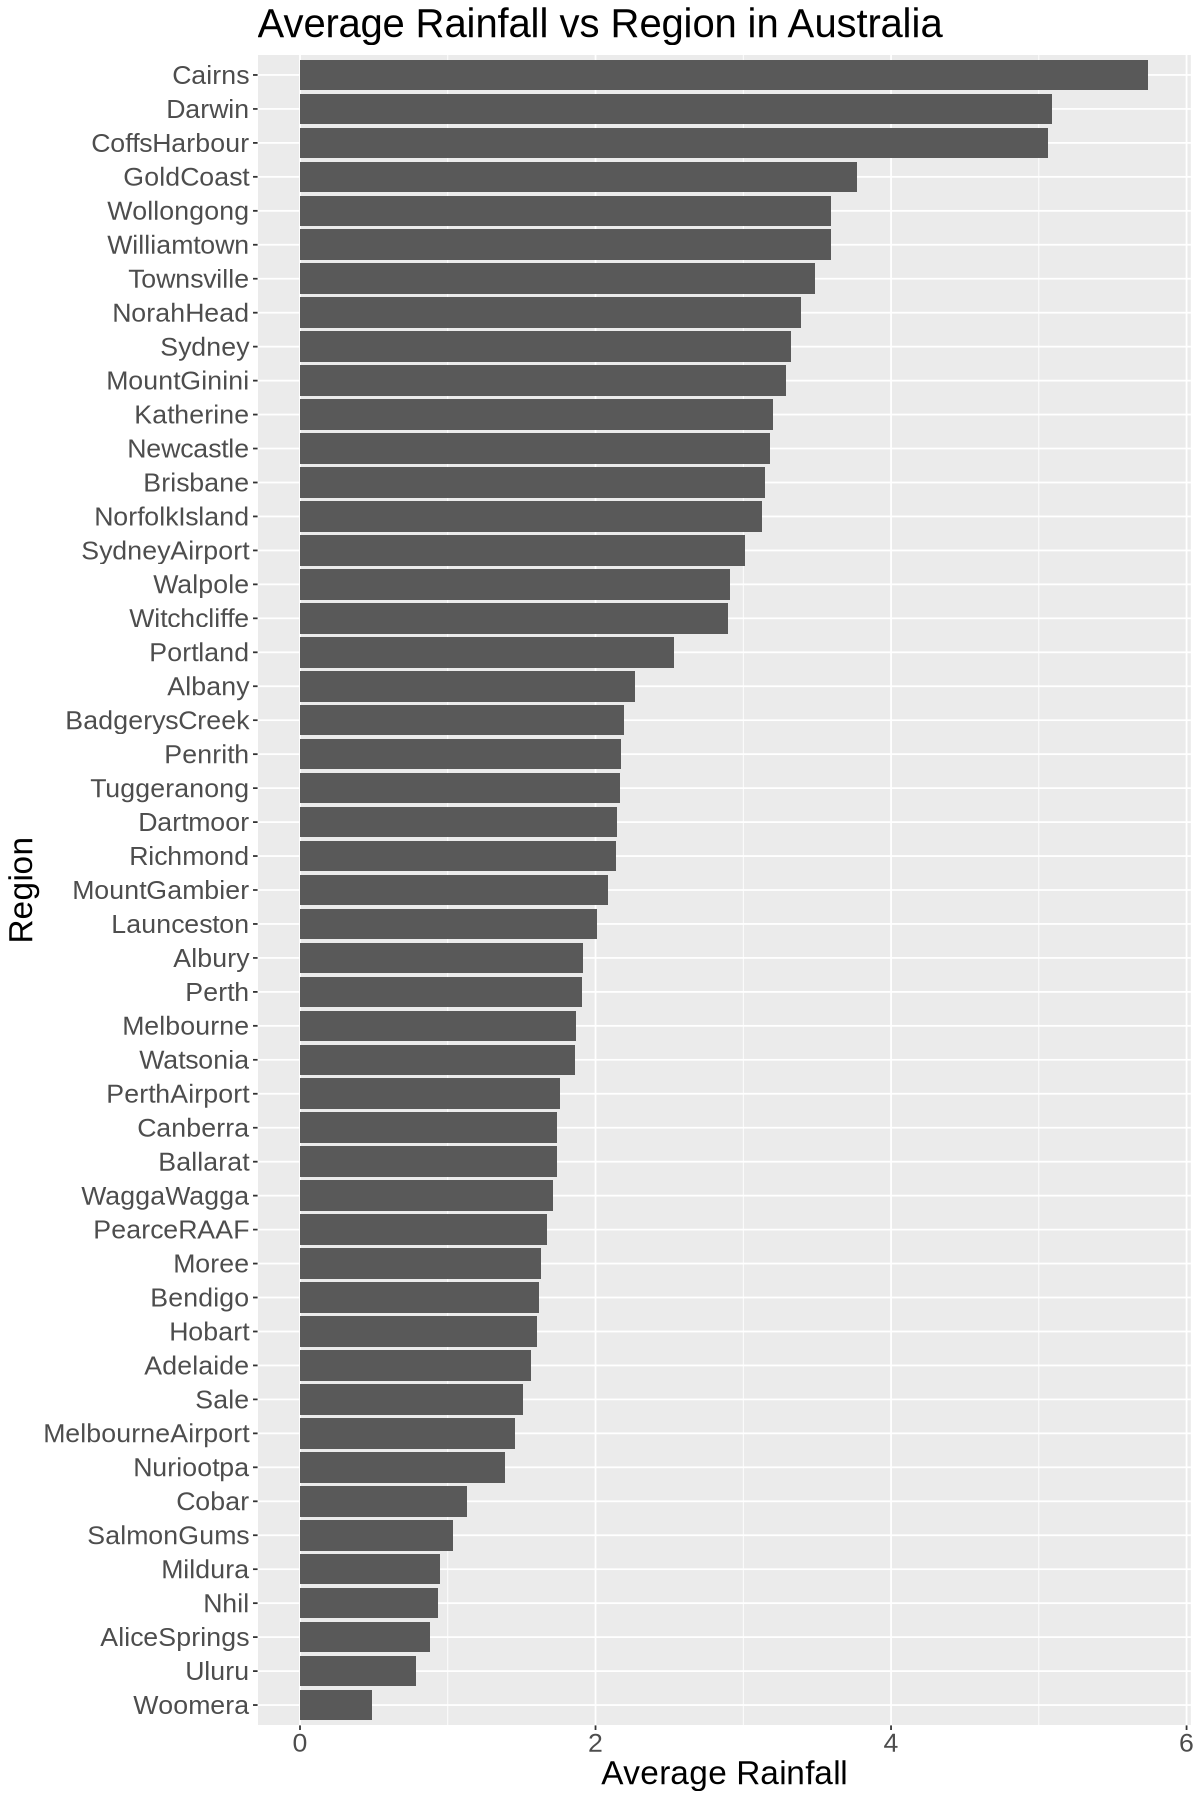

In [5]:
options(repr.plot.width = 10, repr.plot.height = 15) 
splot <- weather_data |> 
        group_by(Location) |>
        summarize(average_rain = mean(Rainfall, na.rm = TRUE)) |>           
        ggplot(aes(x = average_rain, y = fct_reorder(Location, average_rain))) +
            geom_bar(stat = "identity") +
            labs(x = "Average Rainfall", y = "Region", title = "Average Rainfall vs Region in Australia") +
            theme(text = element_text(size = 20))
splot

## Rainfall Level Distribution

How much rain per rainy day across. This is a visualization of the rain levels per rainy day.

Warning message:
“Removed 151 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”


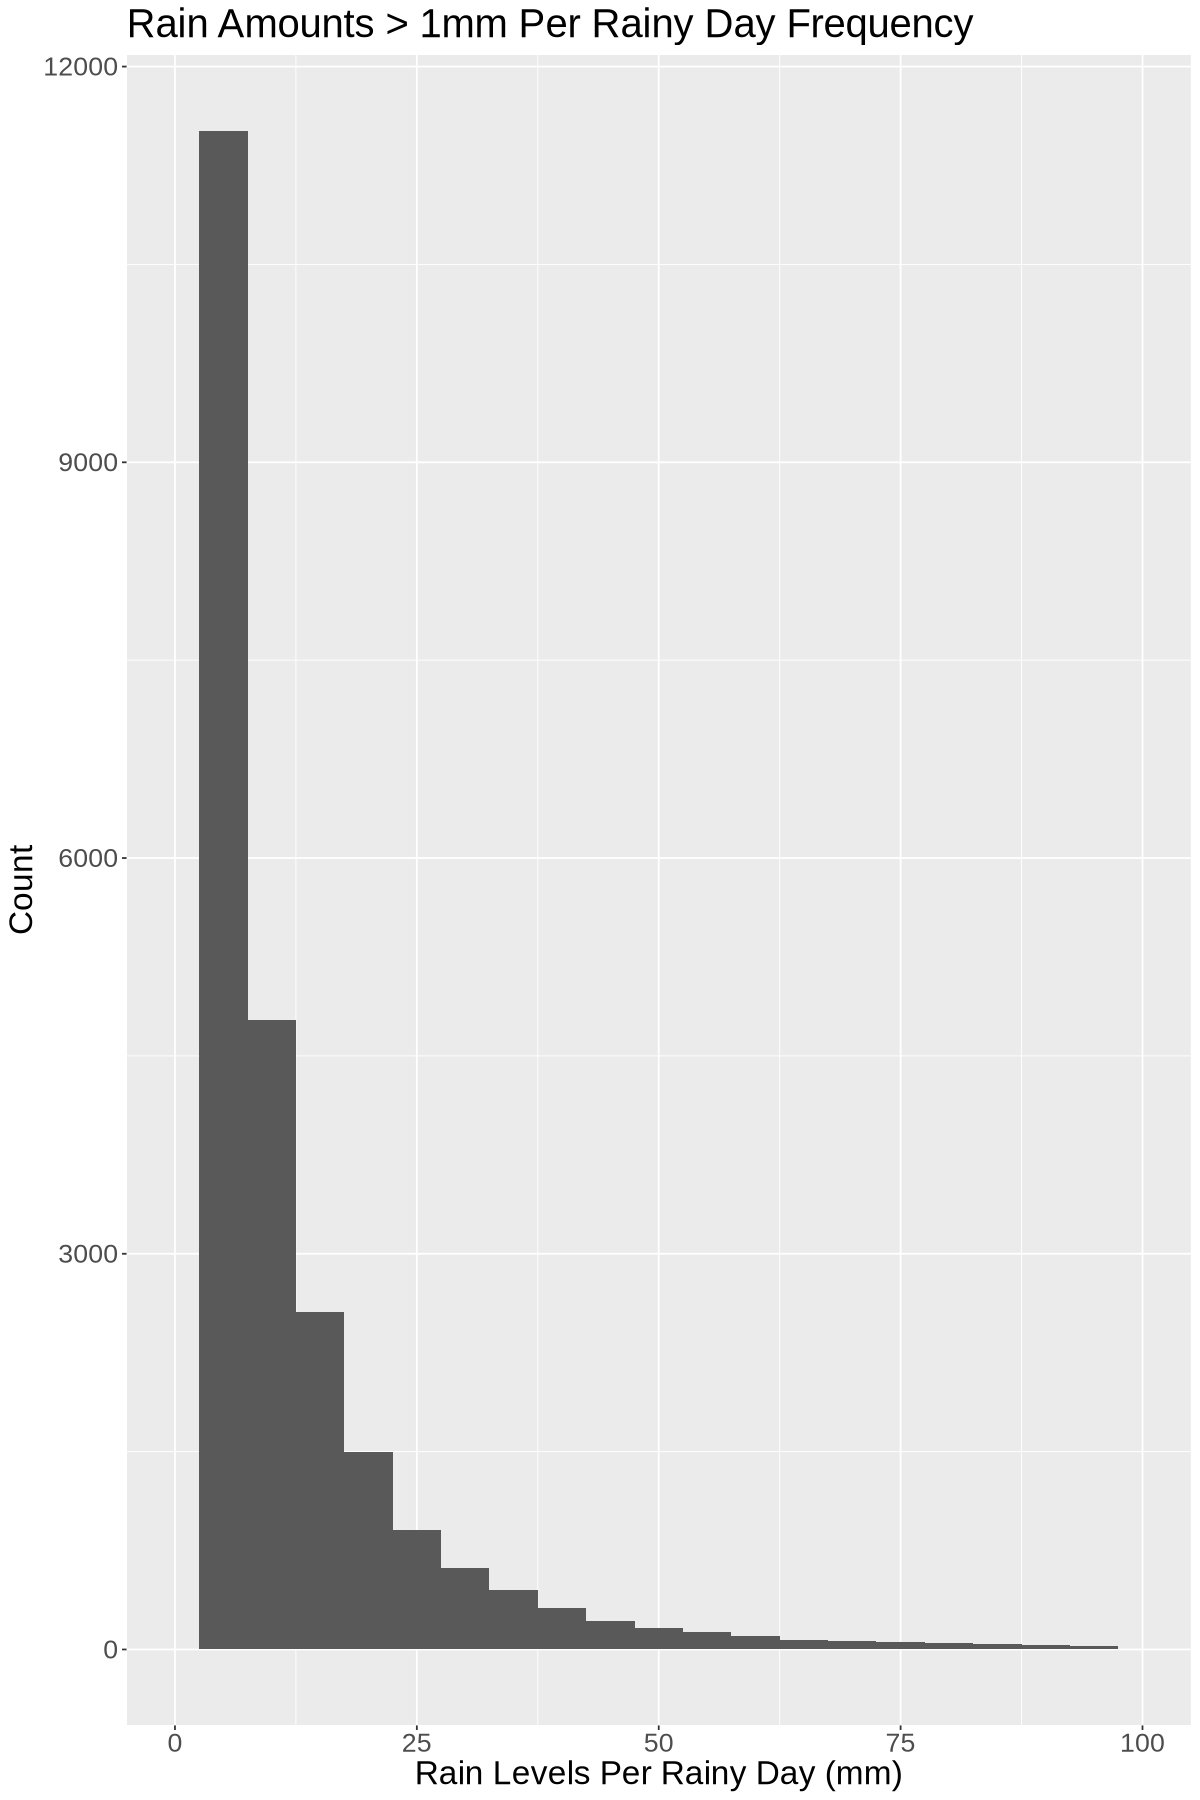

In [6]:
options(repr.plot.width = 10, repr.plot.height = 15) 
rain_level_plot <- weather_data_raw |>
                    select(Rainfall) |>
                    filter(Rainfall > 1) |>
                    ggplot(aes(x=Rainfall)) +
                        geom_histogram(binwidth = 5) +
                        labs(x = "Rain Levels Per Rainy Day (mm)", y = "Count", title = "Rain Amounts > 1mm Per Rainy Day Frequency") +
                        xlim(0, 100) +
                    theme(text = element_text(size = 20))
rain_level_plot

### Observations Per Variable

In [38]:
count <- weather_data_raw |>
            filter(Location=="Sydney" | Location=="Melbourne" | Location=="Canberra") |>
            select(-WindGustDir, -WindDir9am, -WindDir3pm, -RainToday, -RainTomorrow, -Date, -Location) 
output <- as.data.frame((colSums(!is.na(count))))
output

,(colSums(!is.na(count)))
,<dbl>
MinTemp,9483
MaxTemp,9487
Rainfall,9190
Evaporation,8315
Sunshine,8041
WindGustSpeed,8584
WindSpeed9am,9716
WindSpeed3pm,9725
Humidity9am,9413
